# 📊 Comparación de Precios de Celulares y Consolas
### Tiendas en Perú 🇵🇪 vs Tiendas Internacionales 🌐

Este proyecto busca comparar los precios de productos tecnológicos (celulares y consolas de videojuegos) entre tiendas locales en Perú (Hiraoka, Curacao) y precios internacionales (vía API de Google Shopping). Se aplicaron técnicas de Web Scraping, uso de APIs, limpieza y análisis de datos con Python.


# 📱 Análisis de Celulares
En esta sección analizamos los precios de celulares de 3 fuentes: tiendas locales (Curacao, Hiraoka) y Google Shopping API. Se comparan precios y se calculan diferencias respecto al valor de referencia internacional.


/tmp/ipython-input-1-3961310924.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_total = pd.concat([df_curacao, hiraoka, google], ignore_index=True)


📊 Precio promedio por marca y fuente:
fuente    Curacao  Google API  Hiraoka
marca                                 
APPLE     3512.33     1885.63  4517.75
HONOR     1129.83         NaN  1160.58
MOTOROLA   936.71      216.59  1807.79
SAMSUNG   2662.75     1890.24  2759.81
XIAOMI     891.50         NaN   636.88


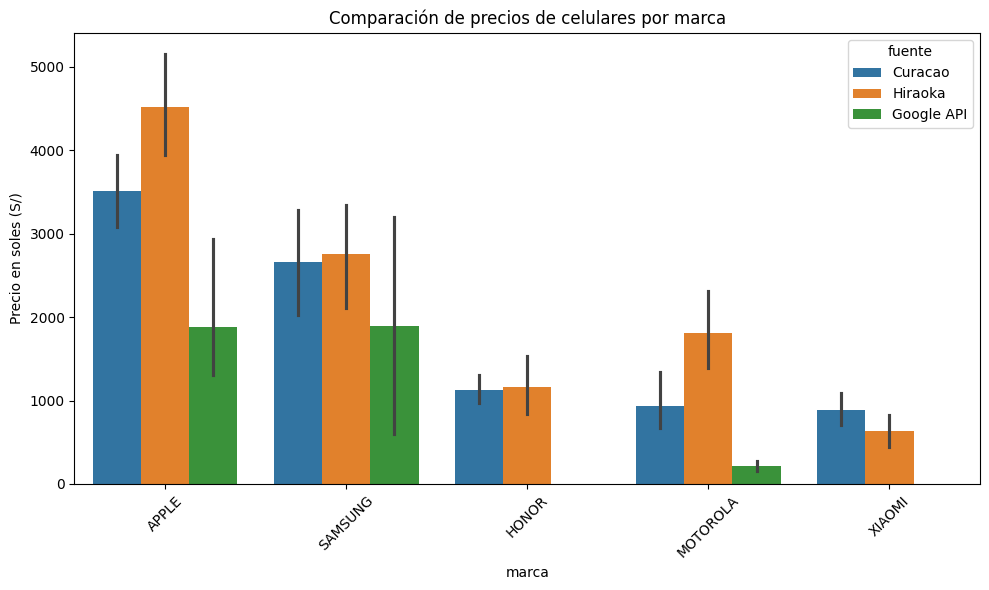

📉 Promedio de descuentos por marca y tienda:
                  descuento_soles  descuento_pct
marca    fuente                                 
APPLE    Curacao          1139.17          24.08
         Hiraoka          1400.00          23.85
HONOR    Curacao           403.75          26.96
         Hiraoka           138.42          12.48
MOTOROLA Curacao           260.00          23.91
         Hiraoka           335.45          15.62
SAMSUNG  Curacao           901.75          24.97
         Hiraoka           563.78          16.25
XIAOMI   Curacao           232.50          22.88
         Hiraoka           100.91          17.97


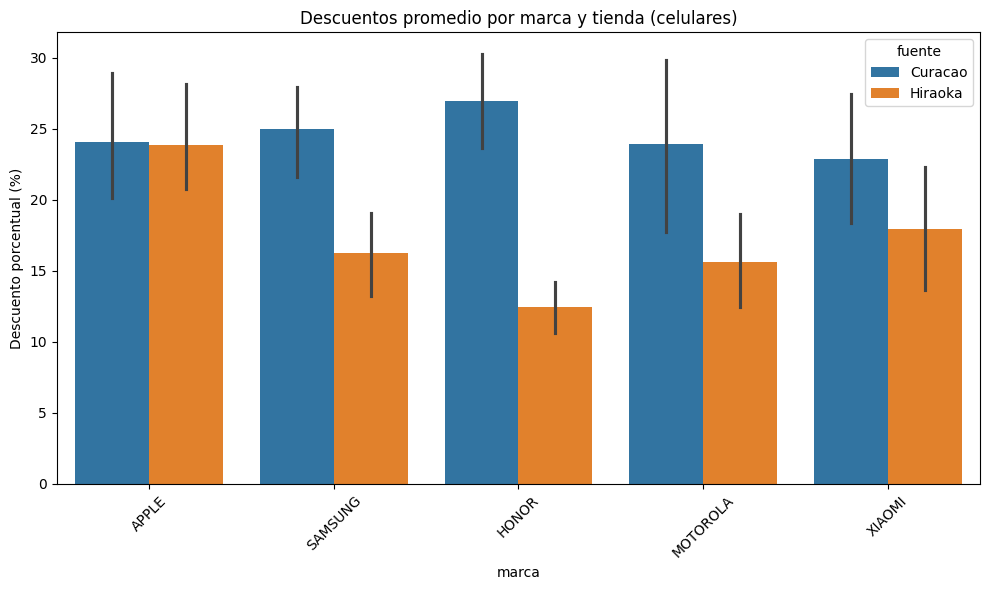

In [1]:
# Paso 0: Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Cargar archivos Curacao
apple = pd.read_csv('apple.csv')
samsung = pd.read_csv('samsung.csv')
honor = pd.read_csv('honor.csv')
motorola = pd.read_csv('motorola.csv')
xiaomi = pd.read_csv('xiaomi.csv')

# Unir archivos de Curacao
df_curacao = pd.concat([apple, samsung, honor, motorola, xiaomi], ignore_index=True)
df_curacao['fuente'] = 'Curacao'

# Paso 2: Cargar archivo Hiraoka
hiraoka = pd.read_csv('celulares_filtrados_por_marca.csv')
hiraoka.rename(columns={
    'nombre': 'modelo',
    'precio_online': 'precio_actual',
    'precio_regular': 'precio_anterior',
    'marca': 'marca'
}, inplace=True)
hiraoka['fuente'] = 'Hiraoka'

# Paso 3: Cargar archivo Google Shopping
google = pd.read_csv('celulares_google_shopping_api_actualizado.csv')
google.rename(columns={
    'Título': 'modelo',
    'Marca Detectada': 'marca',
    'Precio en Soles': 'precio_actual'
}, inplace=True)
google['fuente'] = 'Google API'
google['precio_anterior'] = None  # no hay precio anterior

# Paso 4: Estandarizar columnas y mayúsculas
columnas_finales = ['marca', 'modelo', 'precio_actual', 'precio_anterior', 'fuente']

for df in [df_curacao, hiraoka, google]:
    for col in columnas_finales:
        if col not in df.columns:
            df[col] = None
    df['marca'] = df['marca'].str.upper()
    df = df[columnas_finales]

# Paso 5: Concatenar todo
df_total = pd.concat([df_curacao, hiraoka, google], ignore_index=True)

# Paso 6: Calcular diferencia respecto a Google Shopping
precio_api = google.groupby('marca')['precio_actual'].mean().reset_index()
precio_api.rename(columns={'precio_actual': 'precio_api'}, inplace=True)
df_total = df_total.merge(precio_api, on='marca', how='left')
df_total['diferencia_precio'] = df_total['precio_actual'] - df_total['precio_api']
df_total['diferencia_pct'] = (df_total['diferencia_precio'] / df_total['precio_api']) * 100

# Paso 7: Tabla resumen de precios
resumen = df_total.groupby(['marca', 'fuente'])['precio_actual'].mean().unstack().round(2)
print("📊 Precio promedio por marca y fuente:")
print(resumen)

# Paso 8: Gráfico de comparación de precios
plt.figure(figsize=(10,6))
sns.barplot(data=df_total, x='marca', y='precio_actual', hue='fuente')
plt.title('Comparación de precios de celulares por marca')
plt.ylabel('Precio en soles (S/)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Paso 9: Calcular descuentos (solo tiendas locales)
df_total['descuento_soles'] = df_total['precio_anterior'] - df_total['precio_actual']
df_total['descuento_pct'] = (df_total['descuento_soles'] / df_total['precio_anterior']) * 100

# Paso 10: Tabla resumen de descuentos
descuentos = df_total[df_total['fuente'] != 'Google API'].dropna(subset=['descuento_soles'])
resumen_desc = descuentos.groupby(['marca', 'fuente'])[['descuento_soles', 'descuento_pct']].mean().round(2)
print("📉 Promedio de descuentos por marca y tienda:")
print(resumen_desc)

# Paso 11: Gráfico de descuentos en porcentaje
plt.figure(figsize=(10,6))
sns.barplot(data=descuentos, x='marca', y='descuento_pct', hue='fuente')
plt.title('Descuentos promedio por marca y tienda (celulares)')
plt.ylabel('Descuento porcentual (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🎮 Análisis de Consolas de Videojuegos
Aquí comparamos precios de consolas de videojuegos por marcas, analizando descuentos en soles y porcentajes, y diferencias frente a los precios extraídos por API internacional.


/tmp/ipython-input-2-1686881433.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_total = pd.concat([df_curacao, hiraoka, google], ignore_index=True)


📊 Precio promedio por marca y fuente:
fuente     Curacao  Google API  Hiraoka
marca                                  
ASUS       3789.00     2389.46  3399.00
MICROSOFT  2089.00     1952.66  2699.00
NINTENDO   1567.33     1261.98  1877.00
SONY       2615.52     1769.96  2885.67


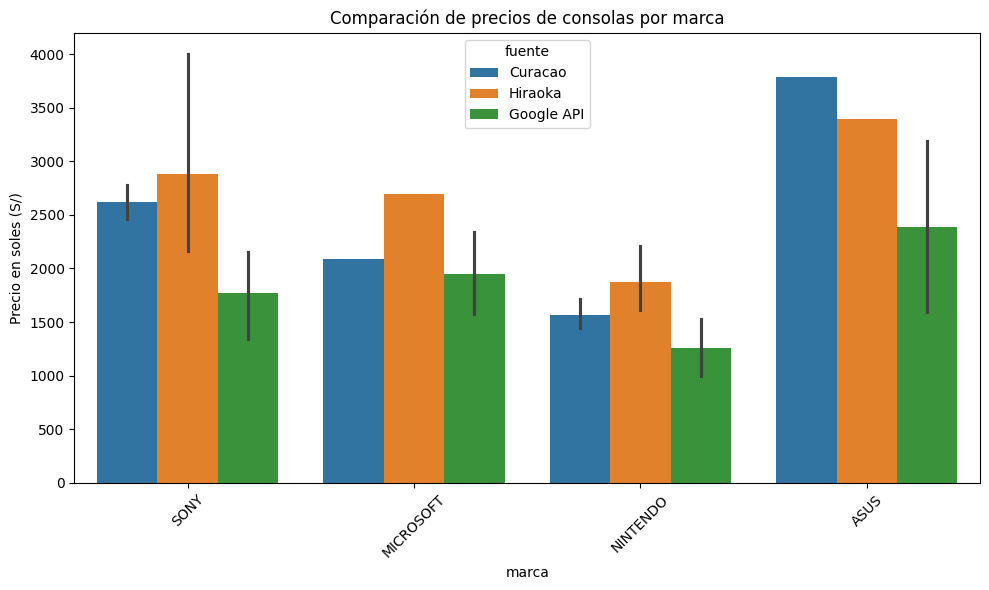

📉 Promedio de descuentos por marca y tienda:
                   descuento_soles  descuento_pct
marca     fuente                                 
ASUS      Curacao           210.00           5.25
          Hiraoka           400.00          10.53
MICROSOFT Curacao           510.00          19.62
          Hiraoka           600.00          18.19
NINTENDO  Curacao           687.08          30.72
          Hiraoka           128.00           6.17
SONY      Curacao          1018.70          27.91
          Hiraoka           196.67           7.52


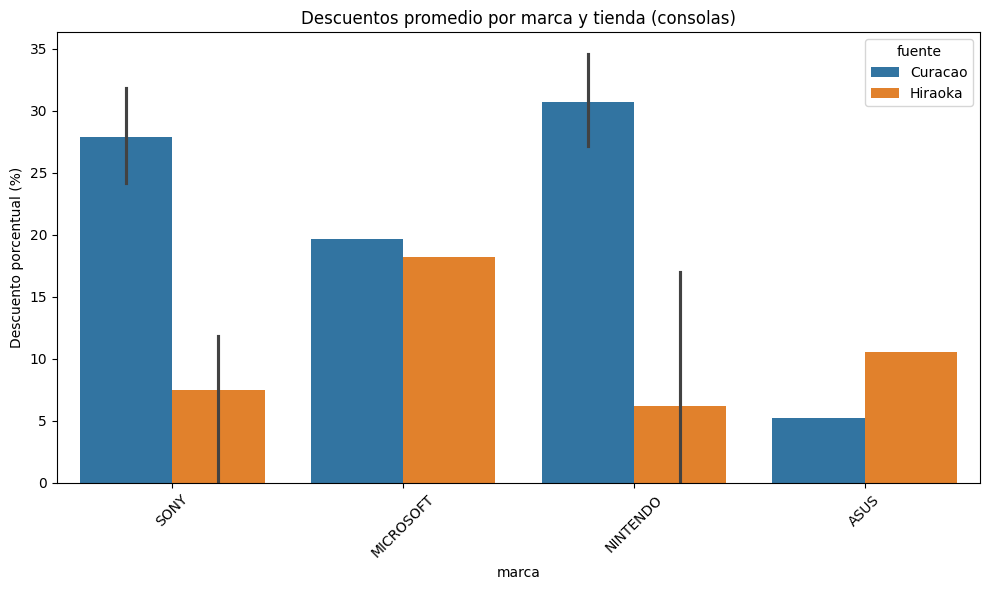

In [2]:
# Paso 0: Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Cargar archivos de Curacao
sony = pd.read_csv('sony.csv')
microsoft = pd.read_csv('microsoft.csv')
nintendo = pd.read_csv('nintendo.csv')
asus = pd.read_csv('asus.csv')

# Unir archivos de Curacao
df_curacao = pd.concat([sony, microsoft, nintendo, asus], ignore_index=True)
df_curacao['fuente'] = 'Curacao'

# Paso 2: Cargar archivo Hiraoka
hiraoka = pd.read_csv('consolas_hiraoka.csv')
hiraoka.rename(columns={
    'nombre': 'modelo',
    'precio_online': 'precio_actual',
    'precio_regular': 'precio_anterior',
    'marca': 'marca'
}, inplace=True)
hiraoka['fuente'] = 'Hiraoka'

# Paso 3: Cargar archivo Google Shopping
google = pd.read_csv('consolas_videojuegos_actualizado.csv')
google.rename(columns={
    'Título': 'modelo',
    'Marca Detectada': 'marca',
    'Precio en Soles': 'precio_actual'
}, inplace=True)
google['fuente'] = 'Google API'
google['precio_anterior'] = None  # no hay precio anterior

# Paso 4: Estandarizar columnas y mayúsculas
columnas_finales = ['marca', 'modelo', 'precio_actual', 'precio_anterior', 'fuente']

for df in [df_curacao, hiraoka, google]:
    for col in columnas_finales:
        if col not in df.columns:
            df[col] = None
    df['marca'] = df['marca'].str.upper()
    df = df[columnas_finales]

# Paso 5: Concatenar todo
df_total = pd.concat([df_curacao, hiraoka, google], ignore_index=True)

# Paso 6: Calcular diferencia respecto a Google Shopping
precio_api = google.groupby('marca')['precio_actual'].mean().reset_index()
precio_api.rename(columns={'precio_actual': 'precio_api'}, inplace=True)
df_total = df_total.merge(precio_api, on='marca', how='left')
df_total['diferencia_precio'] = df_total['precio_actual'] - df_total['precio_api']
df_total['diferencia_pct'] = (df_total['diferencia_precio'] / df_total['precio_api']) * 100

# Paso 7: Tabla resumen de precios
resumen = df_total.groupby(['marca', 'fuente'])['precio_actual'].mean().unstack().round(2)
print("📊 Precio promedio por marca y fuente:")
print(resumen)

# Paso 8: Gráfico de comparación de precios
plt.figure(figsize=(10,6))
sns.barplot(data=df_total, x='marca', y='precio_actual', hue='fuente')
plt.title('Comparación de precios de consolas por marca')
plt.ylabel('Precio en soles (S/)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Paso 9: Calcular descuentos (solo tiendas locales)
df_total['descuento_soles'] = df_total['precio_anterior'] - df_total['precio_actual']
df_total['descuento_pct'] = (df_total['descuento_soles'] / df_total['precio_anterior']) * 100

# Paso 10: Tabla resumen de descuentos
descuentos = df_total[df_total['fuente'] != 'Google API'].dropna(subset=['descuento_soles'])
resumen_desc = descuentos.groupby(['marca', 'fuente'])[['descuento_soles', 'descuento_pct']].mean().round(2)
print("📉 Promedio de descuentos por marca y tienda:")
print(resumen_desc)

# Paso 11: Gráfico de descuentos en porcentaje
plt.figure(figsize=(10,6))
sns.barplot(data=descuentos, x='marca', y='descuento_pct', hue='fuente')
plt.title('Descuentos promedio por marca y tienda (consolas)')
plt.ylabel('Descuento porcentual (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()